# Central Alps download: Austria, Tyrol, Lombardia, Bavaria

In [2]:
# Preamble - Execute only once

%load_ext autoreload
%autoreload 2

import os
NBROOT = os.path.realpath(os.curdir)

In [3]:
# Preamble
import logging
logging.basicConfig(level=logging.DEBUG)

# stdlib
from os.path import exists, join as pjoin, realpath
from pathlib import Path
from urllib.request import urlretrieve
from zipfile import ZipFile

#external
from IPython.display import Image

# self
from src import bbox, gdal_slope_util as S
# from src.gdal_slope_util import check_run, DFLT_OPT, ZSTD_OPT, TILE_OPT

# CPL_ZIP_ENCODING for gdal vsizip:  https://github.com/conda-forge/gdal-feedstock/issues/83
os.environ['CPL_ZIP_ENCODING'] = 'UTF-8'


## All Austria - 10m

Good way to fill up until I figure out how to get Vorarlberg (below).

metadata: 
* *Digitales 10m - Geländemodell aus Airborne Laserscan Daten*: [data.gv.at](https://www.data.gv.at/katalog/dataset/dgm/resource/b347b029-3fd5-448a-8c2c-07f483c2c56e)
* *Digitales Geländemodell (DGM) Österreich* [data.gv.at](https://www.data.gv.at/katalog/dataset/b5de6975-417b-4320-afdb-eb2a9e2a1dbf)

In [10]:
AT_DTM = Path(NBROOT) / 'data/dtm_local/austria_dtm.tif'
AT_DTM.parent.mkdir(exist_ok=True)
atzip = Path('data/austria/ogd-10m-at.zip')
atzip.parent.mkdir(exist_ok=True)
url = 'https://gis.ktn.gv.at/OGD/Geographie_Planung/ogd-10m-at.zip'
if not atzip.exists() and not AT_DTM.exists():
    urlretrieve(url, atzip)
if not exists(AT_DTM):
    with ZipFile(atzip, 'r') as zip_ref:
        zip_ref.extract(member='dhm_at_lamb_10m_2018.tif')  # ... in cwd
        os.rename('dhm_at_lamb_10m_2018.tif', AT_DTM )

## Austria: Tyrol

In [15]:
!mkdir -p data/tyrol
url = 'https://gis.tirol.gv.at/ogd/geografie_planung/DGM/DGM_Tirol_5m_epsg31254.zip'
tyzip = 'data/tyrol/DGM_Tirol_5m_epsg31254.zip' 
TY_DTM = pjoin(NBROOT, 'data/dtm_local/tyrol_dtm.tif')
if not exists(tyzip) and not exists(TY_DTM):
    urlretrieve(url, tyzip)
    with ZipFile(tyzip, 'r') as zip_ref:
        zip_ref.extractall('data/dtm_local/')
        os.rename('data/dtm_local/DGM_Tirol_5m_epsg31254_2006_2019.tif', 'data/dtm_local/tyrol_dtm.tif')

In [16]:
!gdalinfo $TY_DTM | grep -v '^    '

Driver: GTiff/GeoTIFF
Files: /home/me/code/eddy-geek/eslope/development/data/dtm_local/DGM_Tirol_5m_epsg31254_2006_2019.tif
Size is 44724, 26001
Coordinate System is:
PROJCRS["MGI / Austria GK West",
Data axis to CRS axis mapping: 2,1
Origin = (-18617.500000000000000,295002.500000000000000)
Pixel Size = (5.000000000000000,-5.000000000000000)
Metadata:
  AREA_OR_POINT=Area
  DataType=Generic
Image Structure Metadata:
  COMPRESSION=DEFLATE
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (  -18617.500,  295002.500) ( 10d 5' 5.32"E, 47d47'38.06"N)
Lower Left  (  -18617.500,  164997.500) ( 10d 5'24.77"E, 46d37'27.88"N)
Upper Right (  205002.500,  295002.500) ( 13d 4' 5.80"E, 47d45'41.69"N)
Lower Right (  205002.500,  164997.500) ( 13d 0'32.03"E, 46d35'36.15"N)
Center      (   93192.500,  230000.000) ( 11d33'48.48"E, 47d12'10.26"N)
Band 1 Block=256x256 Type=Float32, ColorInterp=Gray
  Min=460.346 Max=3796.002 
  Minimum=460.346, Maximum=3796.002, Mean=1750.300, StdDev=652.179
  NoData Valu

gdalwarp -overwrite -multi -wo NUM_THREADS=ALL_CPUS  -tr 200 -200 /home/me/code/eddy-geek/eslope/development/data/dtm_local/tyrol_dtm.tif /tmp/tiny.tif
Creating output file that is 1118P x 650L.
Processing /home/me/code/eddy-geek/eslope/development/data/dtm_local/tyrol_dtm.tif [1/1] : 0Using internal nodata values (e.g. 3.4e+38) for image /home/me/code/eddy-geek/eslope/development/data/dtm_local/tyrol_dtm.tif.
Copying nodata values from source /home/me/code/eddy-geek/eslope/development/data/dtm_local/tyrol_dtm.tif to destination /tmp/tiny.tif.
...10...20...30...40...50...60...70...80...90...100 - done.
gdaldem color-relief /tmp/tiny.tif ~/code/eddy-geek/TIL/geo/data/gdaldem-relief9.clr /tmp/tiny_relief.png
0...10...20...30...40...50...60...70...80...90...100 - done.


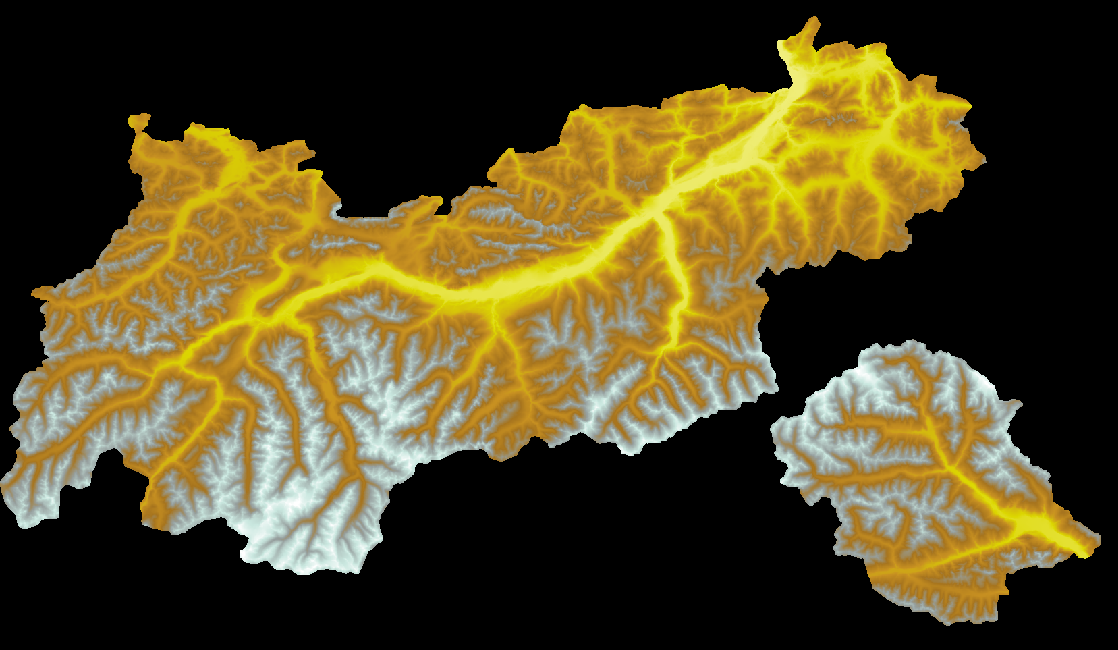

In [17]:
TY_DTM = pjoin(NBROOT, 'data/dtm_local/tyrol_dtm.tif')
Image(S.relief_tiny(TY_DTM, res=200))

## Italy: Lombardia

Download from [geoportale.regione.lombardia.it](https://www.geoportale.regione.lombardia.it/download-pacchetti?p_p_id=dwnpackageportlet_WAR_gptdownloadportlet&p_p_lifecycle=0&p_p_state=normal&p_p_mode=view&_dwnpackageportlet_WAR_gptdownloadportlet_metadataid=%7BFC06681A-2403-481F-B6FE-5F952DD48BAF%7D)

In [6]:
%cd $NBROOT
LB_DTM = realpath('data/dtm_local/lombardia_dtm.tif')
!mkdir -p data/lombardia/dwn
%cd data/lombardia/dwn

/home/me/code/eddy-geek/eslope/development
/home/me/code/eddy-geek/slope-ign-alti/lombardia/dwn


In [7]:
if not exists(LB_DTM):
    LBURL = 'https://www.geoportale.regione.lombardia.it/rlregis_download/service/package?dbId={}&cod={}'
    targets  = []
    # Cities
    for dbid, cod, name in [
                (313, 12, 'Varese' ),
                (313, 13, 'Como'),
                (313, 14, 'Sondrio'),
                # (313, 15, 'Milan'  ),
                (313, 16, 'Bergamo'),
                (313, 17, 'Brescia'),
                # (313, 18, 'Pavia'  ),
                # (313, 19, 'Cremona'),
                # (313, 20, 'Mantova'),
                (313, 97, 'Lecco'  ),
                # (313, 98, 'Lodi'   ),
                (313, 108, 'Monza' ),
            ]:
        target = f'lombardia_{name}_dtm.zip'
        targets.append(target)
        if not exists(target):
            urlretrieve(LBURL.format(dbid, cod), target)

    # Mountains
    for zone in range(1, 24):
        z = 'ZO' + str(zone).rjust(2, '0')
        url = LBURL.format(321, z)
        target = f'lombardia_{z}_dtm.zip'
        targets.append(target)
        if not exists(target):
            urlretrieve(url, f'lombardia_{z}_dtm.zip')

# ~ 3 minutes


In [10]:
targets

['lombardia_Bergamo_dtm.zip',
 'lombardia_Lecco_dtm.zip',
 'lombardia_Monza_dtm.zip',
 'lombardia_Sondrio_dtm.zip',
 'lombardia_Varese_dtm.zip',
 'lombardia_ZO01_dtm.zip',
 'lombardia_ZO02_dtm.zip',
 'lombardia_ZO03_dtm.zip',
 'lombardia_ZO04_dtm.zip',
 'lombardia_ZO05_dtm.zip',
 'lombardia_ZO06_dtm.zip',
 'lombardia_ZO07_dtm.zip',
 'lombardia_ZO08_dtm.zip',
 'lombardia_ZO09_dtm.zip',
 'lombardia_ZO10_dtm.zip',
 'lombardia_ZO11_dtm.zip',
 'lombardia_ZO12_dtm.zip',
 'lombardia_ZO13_dtm.zip',
 'lombardia_ZO14_dtm.zip',
 'lombardia_ZO15_dtm.zip',
 'lombardia_ZO16_dtm.zip',
 'lombardia_ZO17_dtm.zip',
 'lombardia_ZO18_dtm.zip',
 'lombardia_ZO19_dtm.zip',
 'lombardia_ZO20_dtm.zip',
 'lombardia_ZO21_dtm.zip',
 'lombardia_ZO22_dtm.zip',
 'lombardia_ZO23_dtm.zip']

In [14]:
if not exists(LB_DTM):
    S.check_run("gdalinfo '/vsizip/lombardia_ZO06_dtm.zip/DTM5_CM_SEBINO BRESCIANO.IMG' |grep -v '^    '")

Driver: HFA/Erdas Imagine Images (.img)
Files: /vsizip/lombardia_ZO06_dtm.zip/DTM5_CM_SEBINO BRESCIANO.IMG
Size is 3659, 4994
Coordinate System is:
PROJCRS["WGS_1984_UTM_Zone_32N",
Data axis to CRS axis mapping: 1,2
Origin = (575851.869400000199676,5076326.248099999502301)
Pixel Size = (5.000000000000000,-5.000000000000000)
Metadata:
  DataType=Generic
Corner Coordinates:
Upper Left  (  575851.869, 5076326.248) (  9d58'36.17"E, 45d50'10.77"N)
Lower Left  (  575851.869, 5051356.248) (  9d58'22.10"E, 45d36'41.79"N)
Upper Right (  594146.869, 5076326.248) ( 10d12'44.08"E, 45d50' 2.65"N)
Lower Right (  594146.869, 5051356.248) ( 10d12'26.62"E, 45d36'33.73"N)
Center      (  584999.369, 5063841.248) ( 10d 5'32.23"E, 45d43'22.46"N)
Band 1 Block=64x64 Type=Float32, ColorInterp=Undefined
  Description = Layer_1
  Min=181.640 Max=1950.000 
  Minimum=181.640, Maximum=1950.000, Mean=615.285, StdDev=433.963
  NoData Value=-3.4028234663852886e+38
  Overviews: 1830x2497, 915x1249, 458x625, 229x313
  

In [19]:
if not exists(LB_DTM):
    vsi = []
    for pzip in targets:
        zzip = ZipFile(pzip)
        imgs = [path for path in zzip.namelist() if path.endswith('.IMG') or path.endswith('.img')]
        vsi.append(f'/vsizip/{pzip}/{imgs[0]}')


In [12]:
bb_lombardia_calps = bbox.BBox(8.5, 45.583, 10.9, 46.64)

if not exists(LB_DTM):
    srcs = ' '.join(f"'{v}'" for v in vsi)

    cmd = f'''
        gdalwarp {S.DFLT_WARP_OPT}\\
            -te_srs WGS84 -te {bb_lombardia_calps}\\
            -dstnodata -9999 \\
            {srcs} {LB_DTM}
    '''
    print(cmd)
    S.check_run(cmd)

# 3 minutes


        gdalwarp -co COMPRESS=ZSTD -co PREDICTOR=2 -co ZSTD_LEVEL=1 -co TILED=YES -co blockXsize=1024 -co blockYsize=1024 -co BIGTIFF=YES -co NUM_THREADS=ALL_CPUS -multi -wo NUM_THREADS=ALL_CPUS -overwrite \
            -te_srs WGS84 -te 8.5 45.583 10.9 46.64\
            -dstnodata -9999 \
            '/vsizip/lombardia_Bergamo_dtm.zip/DTM5_BG.img' '/vsizip/lombardia_Lecco_dtm.zip/DTM5_LC.img' '/vsizip/lombardia_Monza_dtm.zip/DTM5_MB.img' '/vsizip/lombardia_Sondrio_dtm.zip/DTM5_SO.img' '/vsizip/lombardia_Varese_dtm.zip/DTM5_VA.img' '/vsizip/lombardia_ZO01_dtm.zip/DTM5_CM_OLTREPO PAVESE.IMG' '/vsizip/lombardia_ZO02_dtm.zip/DTM5_CM_ALTO GARDA BRESCIANO.IMG' '/vsizip/lombardia_ZO03_dtm.zip/DTM5_CM_VALLE SABBIA.IMG' '/vsizip/lombardia_ZO04_dtm.zip/DTM5_CM_VALLE TROMPIA.IMG' '/vsizip/lombardia_ZO05_dtm.zip/DTM5_CM_VALLE CAMONICA.IMG' '/vsizip/lombardia_ZO06_dtm.zip/DTM5_CM_SEBINO BRESCIANO.IMG' '/vsizip/lombardia_ZO07_dtm.zip/DTM5_CM_LAGHI BERGAMASCHI.IMG' '/vsizip/lombardia_ZO08_dtm.zip/

gdalwarp -overwrite -multi -wo NUM_THREADS=ALL_CPUS  -tr 200 -200 data/lombardia/dwn/DTM5_CO.img data/lombardia/dwn/DTM5_LC.img /tmp/tiny.tif
Copying raster attribute table from data/lombardia/dwn/DTM5_CO.img to new file.
Creating output file that is 251P x 334L.
Processing data/lombardia/dwn/DTM5_CO.img [1/2] : 0Using internal nodata values (e.g. -3.40282e+38) for image data/lombardia/dwn/DTM5_CO.img.
Copying nodata values from source data/lombardia/dwn/DTM5_CO.img to destination /tmp/tiny.tif.
...10...20...30...40...50...60...70...80...90...100 - done.
Processing data/lombardia/dwn/DTM5_LC.img [2/2] : 0Using internal nodata values (e.g. -3.40282e+38) for image data/lombardia/dwn/DTM5_LC.img.
...10...20...30...40...50gdaldem color-relief /tmp/tiny.tif ~/code/eddy-geek/TIL/geo/data/gdaldem-relief9.clr /tmp/tiny_relief.png
0...10...20...30...40...50...60...70...80...90...100 - done.


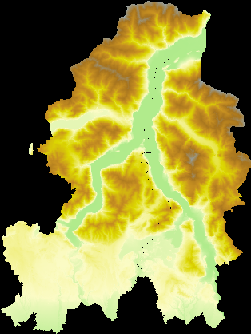

In [18]:
Image(S.relief_tiny('data/lombardia/dwn/DTM5_CO.img data/lombardia/dwn/DTM5_LC.img', 200))

gdalwarp -overwrite -multi -wo NUM_THREADS=ALL_CPUS  -tr 200 -200 data/lombardia/dwn/lombardia_dtm.tif /tmp/tiny.tif
Creating output file that is 922P x 595L.
Processing data/lombardia/dwn/lombardia_dtm.tif [1/1] : 0Using internal nodata values (e.g. -9999) for image data/lombardia/dwn/lombardia_dtm.tif.
Copying nodata values from source data/lombardia/dwn/lombardia_dtm.tif to destination /tmp/tiny.tif.
...10...20...30...40...50...60...70...80...90...100 - done.
gdaldem color-relief /tmp/tiny.tif ~/code/eddy-geek/TIL/geo/data/gdaldem-relief9.clr /tmp/tiny_relief.png
0...10...20...30...40...50...60...70...80...90...100 - done.


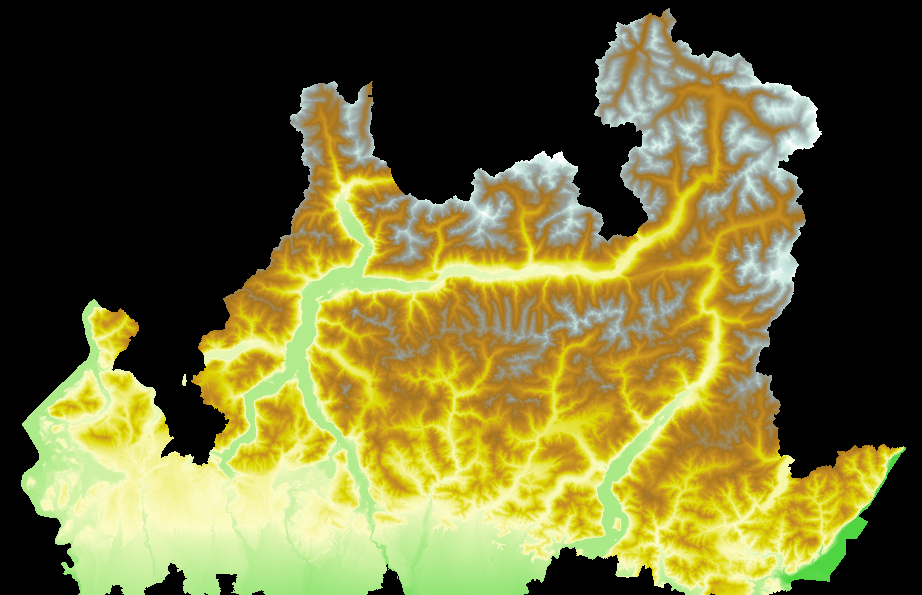

In [6]:
Image(S.relief_tiny('../../dtm_local/lombardia_dtm.tif', 200))

In [24]:
res = 500
S.check_run(f'gdalwarp -overwrite -ot Byte -tr {res} {-res} ../../dtm_local/lombardia_dtm.tif lombardia_dtm_ovr.png')

Creating output file that is 369P x 238L.
Using internal nodata values (e.g. -9999) for image ../../dtm_local/lombardia.tif.
Copying nodata values from source ../../dtm_local/lombardia.tif to destination .
0...10...20...30...40...50...60...70...80...90...100 - done.


0

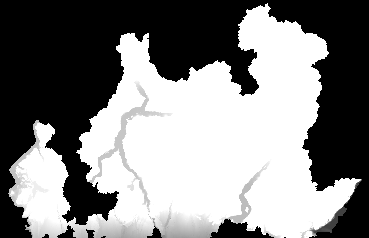

In [25]:
Image('lombardia_dtm_ovr.png')

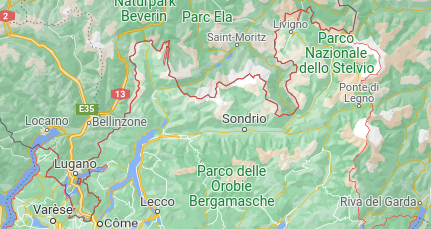

In [10]:
Image(pjoin(NBROOT, '../img/extent-Lombardia-gmaps.png'))

## Germany: Bavaria

from [geodatenonline.bayern.de](https://geodatenonline.bayern.de/geodatenonline/seiten/dgm_info)

EPSG:25832

In [4]:
%cd $NBROOT
BV_DTM = realpath('data/dtm_local/bavaria_dtm.tif')
!mkdir -p data/bavaria
%cd data/bavaria

/home/me/code/eddy-geek/eslope/development
/home/me/code/eddy-geek/slope-ign-alti/bavaria


In [6]:
if not exists(BV_DTM):
    zip = 'bavaria_dtm.zip'
    if not exists(zip):
        urlretrieve('https://www.geodaten.bayern.de/opendata/DGM50_UTM32_EsriGridAscii.zip', zip)
    inputs = [f'/vsizip/{{{zip}}}/{p}\n' for p in ZipFile(zip).namelist() if p.endswith('asc')]
    with open('vrt_inputs.txt', 'w') as f:
            f.writelines(inputs)
    S.check_run(f'gdalbuildvrt -a_srs EPSG:25832 -input_file_list vrt_inputs.txt bavaria_dtm.vrt')
    S.check_run(f'gdal_translate bavaria_dtm.vrt {BV_DTM}')


0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 7400, 7600
0...10...20...30...40...50...60...70...80...90...100 - done.


gdalwarp -overwrite -tr 200 -200 /home/me/code/eddy-geek/slope-ign-alti/dtm_local/bavaria_dtm.tif /tmp/tiny.tif
Creating output file that is 1850P x 1900L.
Processing /home/me/code/eddy-geek/slope-ign-alti/dtm_local/bavaria_dtm.tif [1/1] : 0Using internal nodata values (e.g. -9999) for image /home/me/code/eddy-geek/slope-ign-alti/dtm_local/bavaria_dtm.tif.
Copying nodata values from source /home/me/code/eddy-geek/slope-ign-alti/dtm_local/bavaria_dtm.tif to destination /tmp/tiny.tif.
...10...20...30...40...50...60...70...80...90...100 - done.
gdaldem slope /tmp/tiny.tif -co COMPRESS=ZSTD -co PREDICTOR=2 -co ZSTD_LEVEL=1 -co TILED=YES -co blockXsize=1024 -co blockYsize=1024 -co BIGTIFF=YES -co SPARSE_OK=TRUE -co NUM_THREADS=ALL_CPUS  /tmp/tiny_slope.tif
0...10...20...30...40...50...60...70...80...90...100 - done.
gdaldem color-relief /tmp/tiny_slope.tif ~/code/eddy-geek/TIL/geo/data/gdaldem-slope-eslo13near.clr /tmp/tiny_eslo13near.png -nearest_color_entry
0...10...20...30...40...50...60

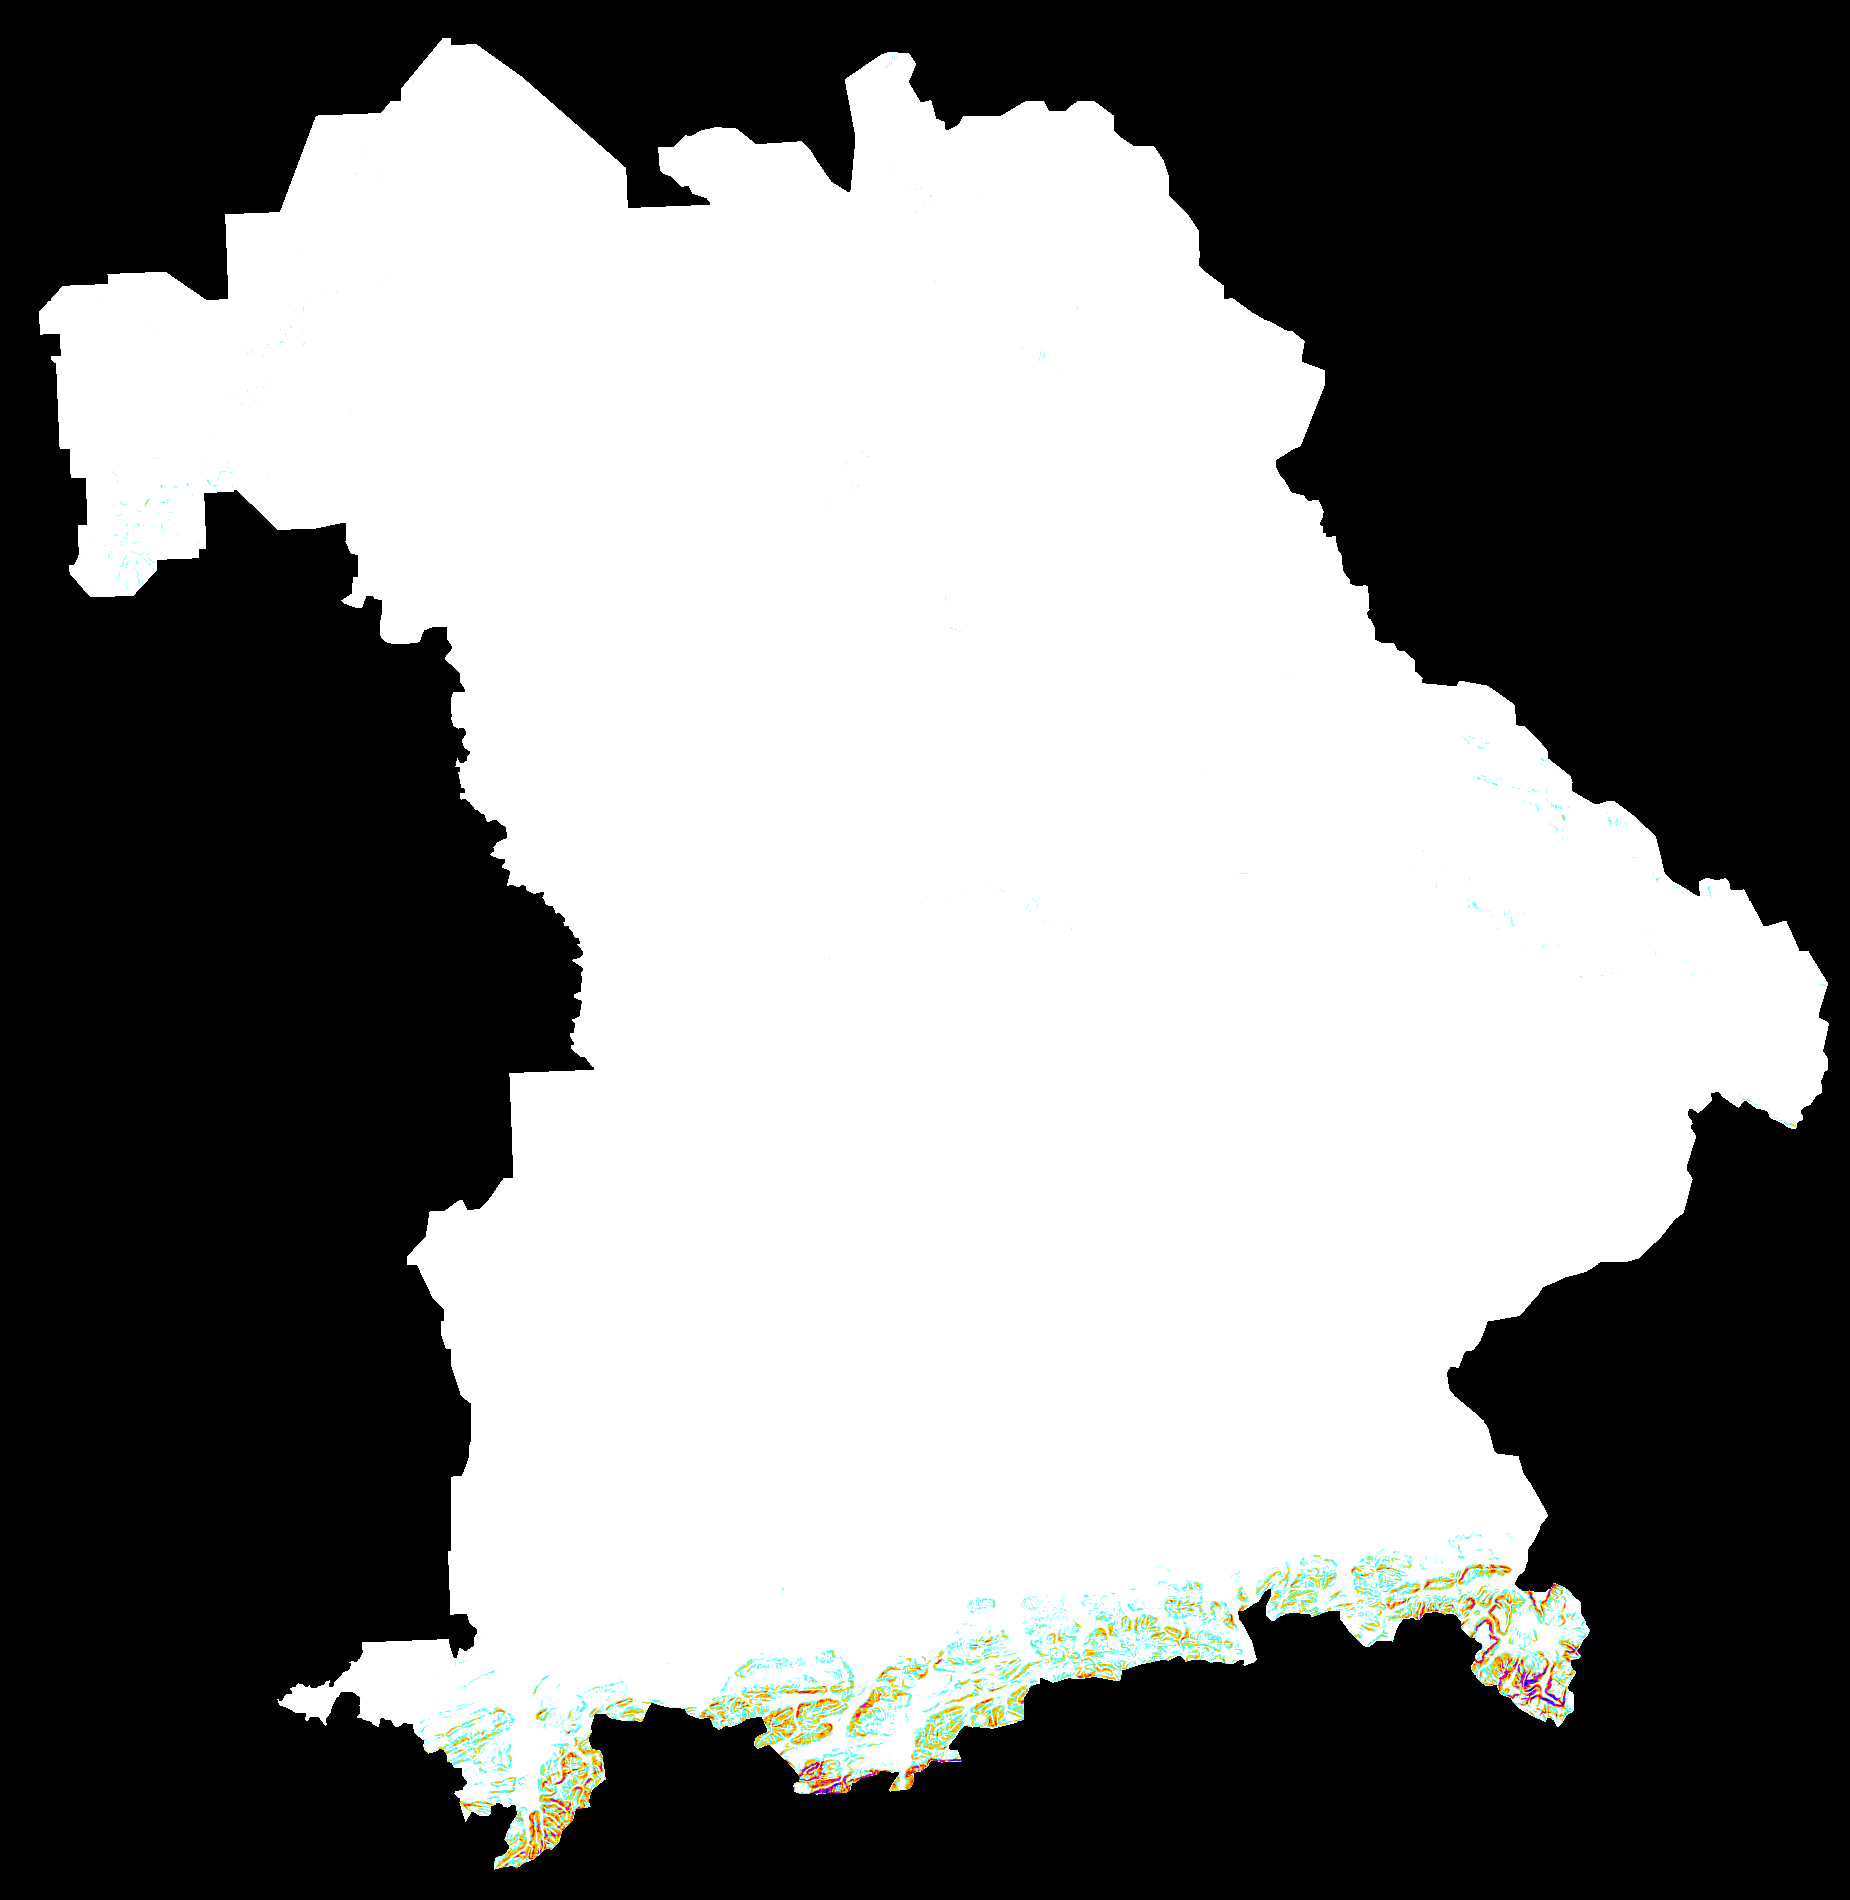

In [12]:
Image(S.eslo_tiny(BV_DTM, res=200))

## Cloud backup

In [12]:
%cd $NBROOT

/home/me/code/eddy-geek/eslope/development


In [8]:
!command -v aws && \
    aws s3 cp --acl public-read data/dtm_local/lombardia_dtm.tif s3://dtmlocal/

/ything/software/anaconda3/bin/aws
upload: data/dtm_local/lombardia_dtm.tif to s3://dtmlocal/lombardia_dtm.tif


In [14]:
!command -v aws && \
    aws s3 cp --acl public-read data/dtm_local/tyrol_dtm.tif s3://dtmlocal/

/ything/software/anaconda3/bin/aws
upload: data/dtm_local/tyrol_dtm.tif to s3://dtmlocal/tyrol_dtm.tif


In [14]:
!command -v aws && \
    aws s3 cp --acl public-read $BV_DTM s3://dtmlocal/

/ything/software/anaconda3/bin/aws
upload: ../dtm_local/bavaria_dtm.tif to s3://dtmlocal/bavaria_dtm.tif


## Vorarlberg

TODO

Related WMS ref online https://github.com/qwc-services/qwc-map-viewer/issues/9

metadata: [data.gv.at](https://www.data.gv.at/katalog/dataset/laserscanning-dhm-vorarlberg) / [data.vorarlberg.at](https://data.vorarlberg.gv.at/ogd/geographieundplanung/laserscanning-dhm.shtm) / **[WMS Server](http://vogis.cnv.at/mapserver/mapserv?map=i_hoehen_und_gelaende_r_wms.map&version=1.3.0&service=wms&request=getcapabilities)**


-> *hoehenmodel gelaende* (=DTM), not *hoehenmodel oberflaeche* (DSM)

Maybe try adding it to JOISM as pointed out in [osmlab](https://osmlab.github.io/editor-layer-index/) ?

Issue with WMS is how to get close to native resolution (see [stackoverflow](https://gis.stackexchange.com/questions/169863/geoserver-wms-get-original-raster-image-in-highest-resolution))